# ML Tech Interview

Hello and welcome to the Machine Learning Tech Interview. This interview will be divided in two parts: the theoretical part and the practical/coding part. 

### **I will review only the scripts that will be sent (by pull request on this repo) by 5:00 pm on Friday**

Good Luck!!

## Theoretical Part

Please answer the following questions. 

#### What are the assumptions of a linear model (or any other type of model)?

Most machine learning models (except Decision Trees and Random Forest) have a series of assumptions that are common between them.

- **Linear relationship:** linear and logistic regression models need the relationship between the independent and dependent variables to be linear. The best way to check this is with scatter plots. 

- **Multivariate normality:** a specific requirement of the linear regression is multivariate normality. Goodness-of-fit tests (Kolmogorov-Smirnov) can be used to confirm normality. And log-transformation sometimes help when the data is not normally distributed.

- **Multicollinearity:** most models also assume that there is no multicollinearity in the data (when features are highly correlated with each other). Because correlated variables add vewry little information to a model, the common solution is to remove them (after identifying using a correlation matrix).

- **Autocorrelation:** this problem occurs when the residuals are not independent from each other (for example in a time series). The Durbin-Watson test can be used to detect autocorrelation in the residuals of a correlation.

- **Homoscedasticity:** much like parametric hypothesis tests, linear regression require homoscedasticity (equal variances across the features).

Other examples of assumptions:

Different models have different requirements. For example, time series models (such as ARIMA) assume stationarity: a process where the mean, variance and autocorrelation structure do not change over time. Another example is the K-means clustering, which assumes that clusters are spherical and of equal size between each other.



#### What’s the difference between K Nearest Neighbor and K-means Clustering?

K Nearest Neighbor (KNN) is a supervised classification or regression algorithm while K-means Clustering, as the name implies, is an unsupervised method for clustering. The models are fundamentally different and the **k** value represents a very different parameter as well.

The KNN as a supervised method requires labeled data to train on. New and unlabeled data is then classified by majority rule of the **k** number of nearest data points. On the other hand, K-means clustering aims to partition data points into **k** clusters. Starting from a random points, K-means iteratively calculates the distance of a point to every other point and updates the mean of each cluster. 

#### How do you address overfitting?

Overfitting is the production of a model that corresponds too closely to a particular set of data, and may therefore fail to predict additional data. This usually occurs when a model has too many features for the amount of data. Overfitting can be detected when our model does much better on the training set than on the test set. There are several ways to address overfitting:

- **Feature selection**: simply dropping columns. 
- **Dimensionality reduction:** techniques such as Principal Component Analysis (PCA) reduce the dimensions of your feature space, hence you have fewer relationships between variables to consider and you are less likely to overfit your model.
- **More data points**
- **Cross validation:** not really a solution but more of a prevention measure, like washing our hands. 
- **Regularization:** these are techniques that attempt to simplify the model such as adding penalties to the cost function.


#### Explain Naive Bayes algorithms.

Naive Bayes is a classification algorithm based on Bayes’ Theorem with very important assumptions of independence between features and that every feature contributes equally to the outcome, hence the naive in the name. 
It is simple and powerful.

#### When do you use an AUC-ROC score? What kind of information can you gather from it?

AUC (area under curve) and ROC (receiver operating characteristic) are evaluation metrics for classification algorithms. 
A ROC curve plots two parameters at all classification thresholds: True Positive Rate and False Positive Rate. It tells how much model is capable of distinguishing between classes. The higher the AUC, better the model is at predicting 0s as 0s and 1s as 1s.

#### What is cross validation?

Cross validation is a statistical technique for testing the perfomance of a machine learning model.It gives us a comprehensive measure of a model's performance throughout the whole dataset. It is particularly useful on limited samples. Such datasets can suffer from selection bias during the test train split. One method of cross validation is the K-fold: it divides the data in to k-splits of test and train. This division is a good way so we can check that our model performs well in the entire data set.



#### What are confounding variables?

When an unknown or unnacounted for variable affects both dependent and independent variables its called a confounding variable. It is particularly problematic in experimental design and interpretation, as it can lead to spurious correlations.

#### If an important metric for our company stopped appearing in our data source, how would you investigate the causes?

At first glance this seems like it could a problem during the ETL process. I would start by asking my colleagues that handle data extraction if this particular metric is still present in the source database where it is extracted from. Next I would check all other points of data transformation and loading to find out where the information is being lost.

## Practical Machine Learning

In this challenge, you will showcase your knowledge in feature engineering, dimensionality reduction, model selection and evaluation, hyperparameter tuning, and any other techniques of machine learning.

There isn't a correct solution to this challenge. All we would like to learn is your thinking process that demonstrates your knowledge, experience, and creativity in developing machine learning models. Therefore, in addition to developing the model and optimizing its performance, you should also elaborate your thinking process and justify your decisions thoughout the iterative problem-solving process.

The suggested time to spend on this challenge is 90-120 minutes. If you don't have time to finish all the tasks you plan to do, simply document the to-dos at the end of your response.

#### Instructions:

- Download the housing prices data set (housing_prices.csv). The data is big enough to showcase your thoughts but not so that processing power will be a problem.
- Using Python, analyze the features and determine which feature set to select for modeling.
- Train and cross validate several regression models, attempting to accurately predict the SalePrice target variable.
- Evaluate all models and show comparison of performance metrics.
- State your thoughts on model performance, which model(s) you would select, and why.

#### Deliverables Checklist:

- Python code.
- Your thinking process.
- The features selected for machine learning.
- The results (e.g., performance metrics) of your selected model(s).

In [147]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.max_rows', 100)

In [108]:
# load the data
housing = pd.read_csv('housing_prices.csv')

In [109]:
# examine the dataset
print(housing.shape)
housing.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [110]:
# my first impressions by looking at the shape is that there could be too many columns for the number of
# observations in the dataset.

In [111]:
housing.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [112]:
housing.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [113]:
# checking for nans
# in the interest of time I won't be checking columns one by one.
# first I will drop any col that has over 5% missing
nan_cols = [col for col in housing.columns if housing[col].isna().sum()/housing.shape[0] > 0.05]
housing.drop(labels=nan_cols, axis=1, inplace= True)

In [114]:
# because there aren't many nans left i will just drop the rows and see how it goes.
housing.dropna(inplace=True)

In [115]:
# let's check the shape again.
housing.shape

# we have dropped 48 rows and 11 columns

(1412, 70)

In [116]:
# there are still lot of cols, let's see how many numeric and how many categorical.
numeric = list(housing.select_dtypes(include='number').columns)
categorical = list(housing.select_dtypes(include='object').columns)

print('Numeric: ', len(numeric))
print('Categorical: ', len(categorical))

Numeric:  36
Categorical:  34


In [117]:
# pretty much 50/50 split
# numerical cols should be fine for now.
# next I will check how many categories are in these categorical variables. if higher than 5 I will drop.

for col in categorical:
    
    categories = housing[col].value_counts().shape[0]
    print(col + ':', categories)
    
    if categories > 5:
        housing.drop(labels=col, axis=1, inplace=True)
        categorical.remove(col)

MSZoning: 5
Street: 2
LotShape: 4
LandContour: 4
Utilities: 2
LotConfig: 5
LandSlope: 3
Neighborhood: 25
Condition2: 8
HouseStyle: 8
RoofMatl: 8
Exterior2nd: 16
ExterQual: 4
ExterCond: 5
Foundation: 5
BsmtQual: 4
BsmtCond: 4
BsmtExposure: 4
BsmtFinType1: 6
Heating: 4
HeatingQC: 5
CentralAir: 2
Electrical: 5
KitchenQual: 4
Functional: 7
SaleType: 9


In [118]:
housing.shape
# we dropped 8 columns due to elevated number of categories. 
# We can be more or less stringent in successive iterations.

(1412, 62)

In [119]:
# next I will convert categorical data to ordinal using labels
le = LabelEncoder()
housing[categorical] = housing[categorical].apply(le.fit_transform)

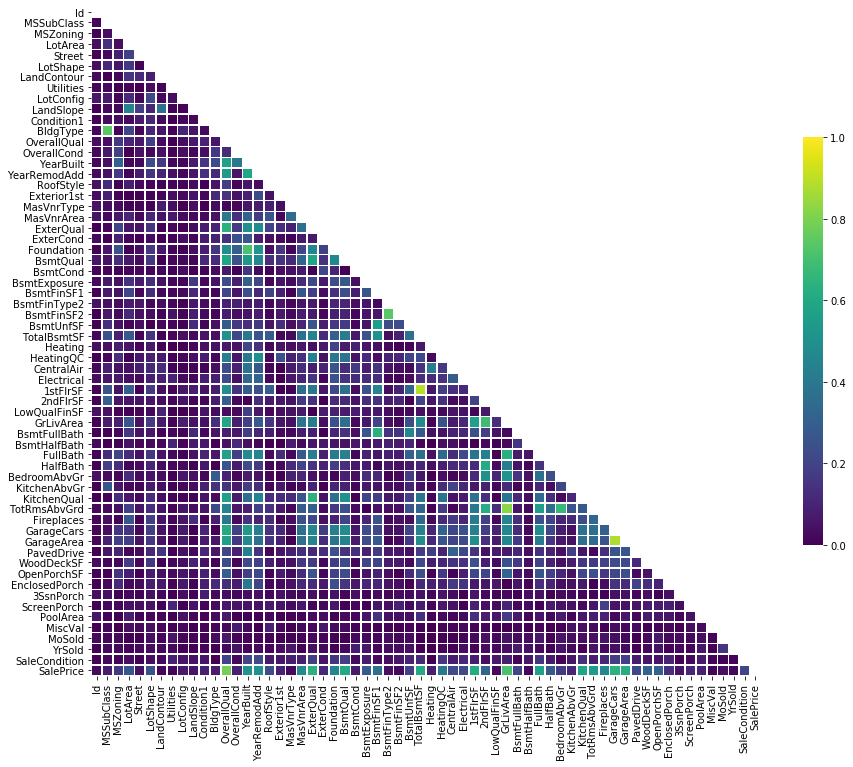

In [120]:
# now every data is numerical I will compute the correlation matrix to remove colinearity features
corr = housing.corr().abs()

# make a heatmap
f, ax = plt.subplots(figsize=(15, 15))

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='viridis', vmin=0, vmax=1,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [121]:
# getting the highest correlated pairs (using .8 as high treshold)
high_corr = corr.unstack().sort_values(ascending=False)
high_corr = high_corr[(high_corr > .8) & (high_corr < 1)]

In [122]:
# get the cols names that are correlated (THIS CODE RIGHT HERE IS FIRE!!)
corr_cols = [x[0] for x in high_corr.index[::2]]
housing.drop(labels=corr_cols, axis=1, inplace=True)

In [123]:
# So far we have converted all categorical variables into ordinal, and we have removed colinearity from the data.
# Right now I would check for all the other assumptions necessary for regression, however I don't have much time
# so I will try to run a regression model on the data as it is.

### Regression algorithms

In [124]:
# separate features and target
X = housing.drop(labels='SalePrice', axis=1)
y = housing['SalePrice']

In [125]:
# scale features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [126]:
# make the split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [127]:
# initialize linear regression model
lr = LinearRegression()

# fit training data
model = lr.fit(X_train, y_train)

In [128]:
# get score
model.score(X_test, y_test)

0.6475579420948371

In [129]:
# A simple linear regression gave a score of 64%, but we can probably do better than that.
# Let's try a different model.

# initialize decision tree model
dtr = DecisionTreeRegressor(random_state=42)
model = dtr.fit(X_train, y_train)
model.score(X_test, y_test)

0.611886167563807

In [155]:
# KNN regression
# initialize the model
for i in range(1, 15):
    knnr = KNeighborsRegressor(i)
    model = knnr.fit(X_train, y_train)
    score = model.score(X_test, y_test)
    print(i, score)

1 0.6663433989406355
2 0.6724995157171451
3 0.6853904101359062
4 0.7110097663368719
5 0.7081599121386795
6 0.7143919976656409
7 0.7080874921920837
8 0.7221190633720622
9 0.7237172345343379
10 0.7218769306571768
11 0.7109018376533158
12 0.7214539868727494
13 0.7206729982810343
14 0.7207528917394866


In [159]:
# random forest regression
for i in range(1, 15):
    rfr = RandomForestRegressor(max_depth=i, random_state=42, n_estimators=10)
    rfr.fit(X_train, y_train)
    score = rfr.score(X_test, y_test)
    print(i, score)

1 0.5267876963114226
2 0.6965468858552232
3 0.7565837320688781
4 0.8131054421317994
5 0.8092960679966439
6 0.8282335102134829
7 0.8340003163970241
8 0.8206421004818844
9 0.8296570281295365
10 0.8405588926592754
11 0.8265954379017115
12 0.82456690443428
13 0.8401801847007176
14 0.8249510441788432


In [164]:
# cross validate the results of the random forest regressor
cv_rfr = cross_val_score(rfr, X, y, cv=6)
cv_rfr

array([0.8455665 , 0.88093186, 0.79721282, 0.8757692 , 0.8441133 ,
       0.67990409])

In [176]:
rfr = RandomForestRegressor(max_depth=6, random_state=42, n_estimators=10)
rfr.fit(X_train, y_train)
score = rfr.score(X_train, y_train)
print('Train score:', score)

y_pred_train = rfr.predict(X_train)
y_pred_test = rfr.predict(X_test)
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('mse train', mse_train)
print('mse test', mse_test)

Train score: 0.9275029012809354
mse train 444257311.3000241
mse test 1181591279.1310465


**The best model so far was the Random Forest Regression with a r2 score of 84% and max_depth=10. There could be some problems in overfitting since there is a 12% difference in performance between train set and test sets.**

**One possible solution is to use less forest depth. For example a depth of 6 only represents a decrease in 1% performace but the difference between train and test set is lower: 10%**

**The differences between MSE are perhaps too big...**